# Linear Regression on Polynomial data behavior

In this exercise, we will see how to properly use a linear regression with some data, which seems to follow a polynomial function.

https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises/4379516-decouvrez-la-reduction-dimensionnelle-non-lineaire

The aim is to add new features, which are the data elevated to a certain number (x** 2, x** 3, ...)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from pylab import *

In [21]:
def generateDataset(x):
    return x * np.cos(x) + np.random.normal(size=1000)*2

In [22]:
X = np.linspace(0,10,1000)
rng = np.random.RandomState(0)
rng.shuffle(X)
X = np.sort(X[:])
y = generateDataset(X)

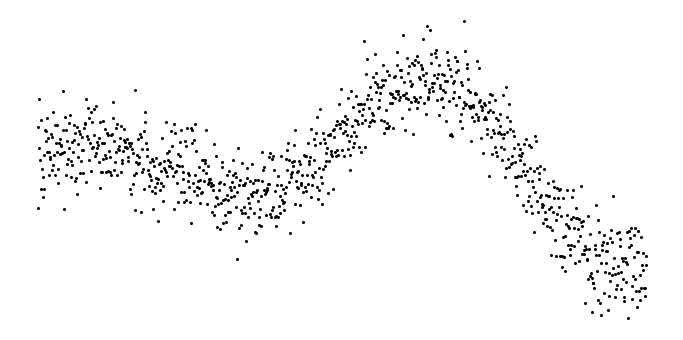

In [23]:
plt.plot(X, y, 'o', color='black', markersize=2)
plt.axis('off')
plt.show()
rcParams['figure.figsize'] = (12, 6)

As we see, the data seems to be polynomial, then we are going to use this trick

In [24]:
X_augmented = np.array([X, X**2, X**3, X**4, X**5]).T
print(X_augmented)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00100100e-02 1.00200300e-04 1.00300601e-06 1.00401002e-08
  1.00501504e-10]
 [2.00200200e-02 4.00801202e-04 8.02404808e-06 1.60641603e-07
  3.21604811e-09]
 ...
 [9.97997998e+00 9.96000004e+01 9.94006010e+02 9.92016008e+03
  9.90029990e+04]
 [9.98998999e+00 9.97999000e+01 9.97000002e+02 9.96002004e+03
  9.95005005e+04]
 [1.00000000e+01 1.00000000e+02 1.00000000e+03 1.00000000e+04
  1.00000000e+05]]


In [16]:
regr = linear_model.LinearRegression()
regr.fit(X_augmented, y)
predictions = regr.predict(X_augmented)

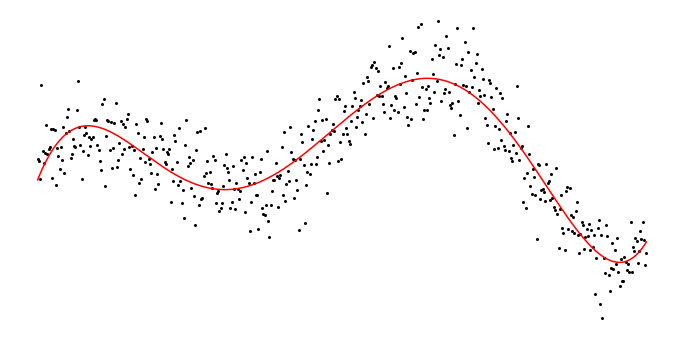

In [17]:
plt.plot(X_augmented[:,0], y, 'o', color='black', markersize=2)
plt.plot(X_augmented[:,0], predictions, '-', color='red')
plt.axis('off')
plt.show()

We need to be careful of initial datas since they will need to be normalized in order to not increase too much when converted into a x ** k ...